# Genetical Algorithms

In [1]:
from genetical_algorithms import genetical_algorithms
from test_functions import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as pltanimation
import seaborn as sns
%matplotlib notebook
# %matplotlib widget
# %matplotlib inline

<IPython.core.display.Javascript object>


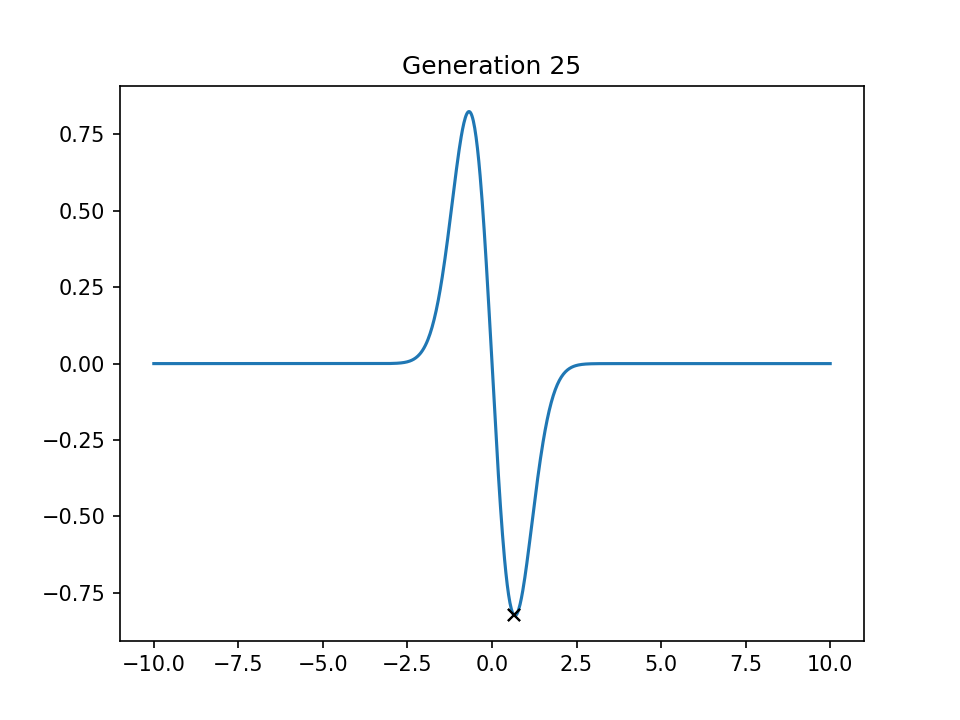

In [2]:
class AnimateCGA_1D:
    anms = None
    fig = plt.figure(dpi=150)
    
    def __init__(self, f, populations, area):
        self.f = np.vectorize(f)
        self.populations = populations
        self.area = area
    
    def animate(self, i):
        plt.clf()

        d = np.linspace(self.area[0], self.area[1], num=1000)
        
        points = np.asarray(self.populations[i][:, 1], dtype=np.float128)
        values = self.f(points)
        
        self.plt_f = plt.plot(d, self.f(d))
        self.plt_p = plt.plot(points, values, 'xk')
        self.plt_l = plt.title("Generation {}".format(i))
        
    
    def get_animation(self):
        return pltanimation.FuncAnimation(self.fig, self.animate, frames=len(self.populations),
                                          interval=500, repeat=True)
        
    

## The Canonical Genetical Algorithm

In [3]:
f = lambda x: -(x + np.sin(x)) * np.exp(-x**2.0)
best, populations = genetical_algorithms.CGA(
    lambda x: -f(x),
    [-10, 10],
    gen_length=16
)
print("best genotype {} ar point {} with value {}".format(best[0], best[1], best[2]))

0: number of genotypes 56
1: number of genotypes 62
2: number of genotypes 60
3: number of genotypes 24
4: number of genotypes 18
5: number of genotypes 20
6: number of genotypes 14
7: number of genotypes 16
8: number of genotypes 16
9: number of genotypes 16
10: number of genotypes 18
11: number of genotypes 18
12: number of genotypes 16
13: number of genotypes 14
14: number of genotypes 12
15: number of genotypes 14
16: number of genotypes 12
17: number of genotypes 10
18: number of genotypes 10
19: number of genotypes 10
20: number of genotypes 8
21: number of genotypes 6
22: number of genotypes 6
23: number of genotypes 6
24: number of genotypes 2
best genotype 1100110001111011 ar point 0.650186923018234 with value 0.82267708937448427963


In [4]:
animation = AnimateCGA_1D(f, populations, [-10, 10])
animation.get_animation().save("genetical-onedim.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [5]:
f = sphere
area = [-2, 2]
best, populations = genetical_algorithms.CGA(
    lambda x: - f(x),
    area,
    dim=2,
    gen_length=10,
)
print("best genotype {} ar point {} with value {}".format(best[0], best[1:-1], best[-1]))

0: number of genotypes 54
1: number of genotypes 52
2: number of genotypes 54
3: number of genotypes 52
4: number of genotypes 52
5: number of genotypes 50
6: number of genotypes 52
7: number of genotypes 54
8: number of genotypes 54
9: number of genotypes 56
10: number of genotypes 60
11: number of genotypes 60
12: number of genotypes 64
13: number of genotypes 66
14: number of genotypes 68
15: number of genotypes 68
16: number of genotypes 76
17: number of genotypes 76
18: number of genotypes 74
19: number of genotypes 74
20: number of genotypes 76
21: number of genotypes 74
22: number of genotypes 82
23: number of genotypes 76
24: number of genotypes 82
25: number of genotypes 80
26: number of genotypes 78
27: number of genotypes 78
28: number of genotypes 78
29: number of genotypes 78
30: number of genotypes 84
31: number of genotypes 82
32: number of genotypes 86
33: number of genotypes 92
34: number of genotypes 96
35: number of genotypes 96
36: number of genotypes 106
37: number

<IPython.core.display.Javascript object>


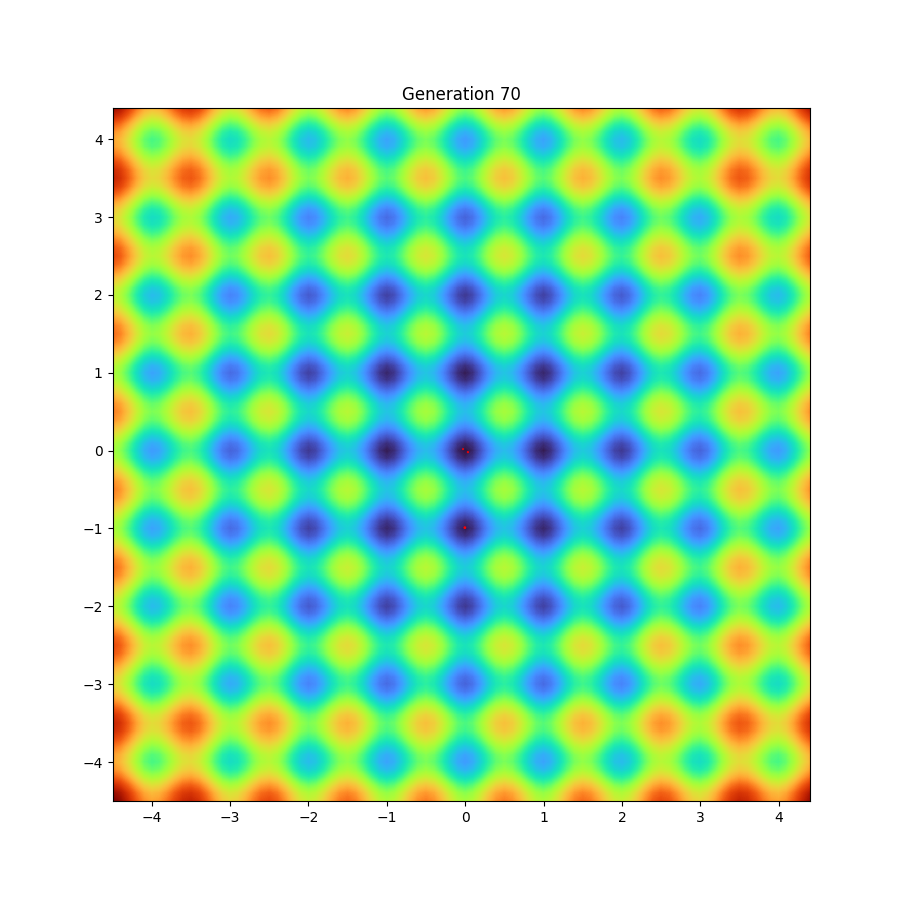

In [19]:
def plot_contour(f, fig, ax, xy_range=[-10, 10], step=0.1, cmap=cm.gist_ncar, quality=100, bar=True):
    X = np.arange(*xy_range, step)
    Y = np.arange(*xy_range, step)
    X, Y = np.meshgrid(X, Y)
    get_f = lambda i: (f(np.array([X[i, j], Y[i, j]])) for j in range(X.shape[1]))
    a = np.fromiter(chain.from_iterable(get_f(i) for i in range(X.shape[0])), float, X.shape[0]*X.shape[1])
    Z = a.reshape(X.shape)
    plot = ax.contourf(X, Y, Z, np.arange(Z.min(), Z.max(), step), cmap=cmap)
    if bar:
        fig.colorbar(plot, ax=ax, shrink=0.5, aspect=5)
    return fig

class AnimateCGA_2D:
    anms = None
    fig = plt.figure(figsize=(9, 9))
    ax1 = fig.add_subplot(1, 1, 1)
    
    def __init__(self, f, populations, area):
        self.f = f
        self.populations = populations
        self.area = [area[0] - 0.5, area[1] + 0.5]
    
    def animate(self, i):
#         plt.clf()
        self.ax1.clear()

        d = np.linspace(self.area[0], self.area[1], num=1000)
        
        points = np.asarray(self.populations[i][:, 1:-1], dtype=np.float128)
        values = np.apply_along_axis(self.f, 1, points)
        
        self.contour = plot_contour(self.f, fig=self.fig, ax=self.ax1, xy_range=self.area, cmap=cm.turbo,
                                   bar=False)
        self.plt_s = self.ax1.scatter(points[:,0], points[:,1], values, color='r', marker='o')
        self.plt_l = self.ax1.set_title("Generation {}".format(i))
        
    
    def get_animation(self):
        return pltanimation.FuncAnimation(self.fig, self.animate, frames=len(self.populations),
                                          interval=300, repeat=True)
        
    

In [20]:
animation = AnimateCGA_2D(f, populations, area)
animation.get_animation().save("genetical-twodim.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [22]:
rastrigin_area = [-4, 4]
rastrigin_best, rastrigin_populations = genetical_algorithms.CGA(
    lambda x: -rastrigin(x),
    rastrigin_area,
    dim=2,
    gen_length=10,
)
print("best genotype {} ar point {} with value {}".format(best[0], best[1:-1], best[-1]))

0: number of genotypes 54
1: number of genotypes 62
2: number of genotypes 60
3: number of genotypes 58
4: number of genotypes 58
5: number of genotypes 58
6: number of genotypes 58
7: number of genotypes 62
8: number of genotypes 62
9: number of genotypes 58
10: number of genotypes 58
11: number of genotypes 52
12: number of genotypes 52
13: number of genotypes 54
14: number of genotypes 54
15: number of genotypes 54
16: number of genotypes 48
17: number of genotypes 48
18: number of genotypes 42
19: number of genotypes 42
20: number of genotypes 40
21: number of genotypes 34
22: number of genotypes 40
23: number of genotypes 40
24: number of genotypes 38
25: number of genotypes 36
26: number of genotypes 36
27: number of genotypes 34
28: number of genotypes 36
29: number of genotypes 36
30: number of genotypes 38
31: number of genotypes 40
32: number of genotypes 46
33: number of genotypes 46
34: number of genotypes 40
35: number of genotypes 40
36: number of genotypes 44
37: number 

In [23]:
animation = AnimateCGA_2D(rastrigin, rastrigin_populations, rastrigin_area)
animation.get_animation().save("genetical-rastrigin.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [24]:
def generate_CGA_result(f, area, name):
    best, populations = genetical_algorithms.CGA(
        lambda x: -f(x),
        area,
        dim=2,
        gen_length=10,
    )
    print("best genotype {} ar point {} with value {}".format(best[0], best[1:-1], best[-1]))

    animation = AnimateCGA_2D(rastrigin, populations, area)
    animation.get_animation().save("genetical-"+ name +".gif")
    return best, populations

In [ ]:
generate_CGA_result(eggholder, [400, 515], 'eggholder')

0: number of genotypes 56
1: number of genotypes 54
2: number of genotypes 58
3: number of genotypes 52
4: number of genotypes 48
5: number of genotypes 46
6: number of genotypes 48
7: number of genotypes 50
8: number of genotypes 52
9: number of genotypes 48
10: number of genotypes 46
11: number of genotypes 50
12: number of genotypes 50
13: number of genotypes 52
14: number of genotypes 54
15: number of genotypes 52
16: number of genotypes 56
17: number of genotypes 50
18: number of genotypes 46
19: number of genotypes 44
20: number of genotypes 44
21: number of genotypes 38
22: number of genotypes 40
23: number of genotypes 40
24: number of genotypes 38
25: number of genotypes 42
26: number of genotypes 40
27: number of genotypes 40
28: number of genotypes 42
29: number of genotypes 44
30: number of genotypes 42
31: number of genotypes 48
32: number of genotypes 50
33: number of genotypes 46
34: number of genotypes 44
35: number of genotypes 46
36: number of genotypes 46
37: number 

MovieWriter ffmpeg unavailable; using Pillow instead.


best genotype 10100010000111111101 ar point ['488.0205278592375' '438.4457478005865'] with value 950.7962060447170118
